# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

#### Preliminary

* import libraries
* load data
* examine and get summary stats
* plot histogram of data and sample (130) of normal distribution for comparison

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests
import seaborn as sns
sns.set()

C:\Users\saus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe(include='all')

,temperature,gender,heart_rate
count,130.000000,130,130.000000
unique,NaN,2,NaN
top,NaN,F,NaN
freq,NaN,65,NaN
mean,98.249231,NaN,73.761538
std,0.733183,NaN,7.062077
min,96.300000,NaN,57.000000
25%,97.800000,NaN,69.000000
50%,98.300000,NaN,74.000000
75%,98.700000,NaN,79.000000


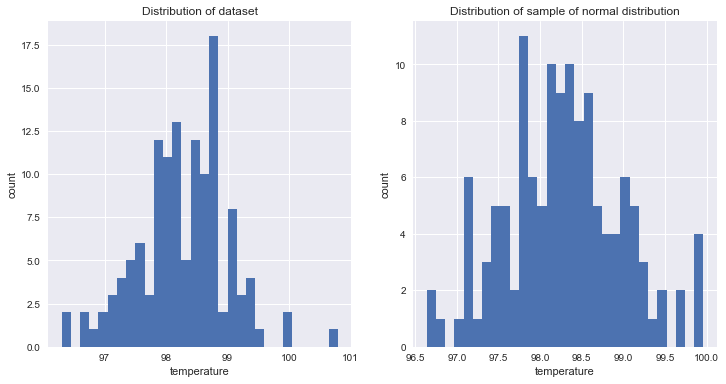

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(df.temperature, bins=30);
plt.xlabel('temperature')
plt.ylabel('count')
plt.title('Distribution of dataset')
plt.subplot(1, 2, 2)
plt.hist(np.random.normal(loc=98.249231, scale=0.733183, size=130), bins=30);
plt.xlabel('temperature')
plt.ylabel('count')
plt.title('Distribution of sample of normal distribution');

#### Q1: Is the distribution of body temperatures normal?

The distribution is normal as shown by the normal-quantile plot.  A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.  In the calls to sm.qqplot below, the data are sorted and plotted against the theoretical quantiles from a normal distribution with the same mean and standard deviation.  In the subplot on the left we see the temperature data from the dataset; on the right we see a sample from the normal distribution with the same mean and standard deviation.

The library function stats.normaltest is used to test normality as a null hypothesis.  In other words, this test is used to disprove normality in an experiment.  The p-value returned from the call, 0.26, does not allow us to conclude the the distribution is not normal and suggests that the distribution may in fact be normal.

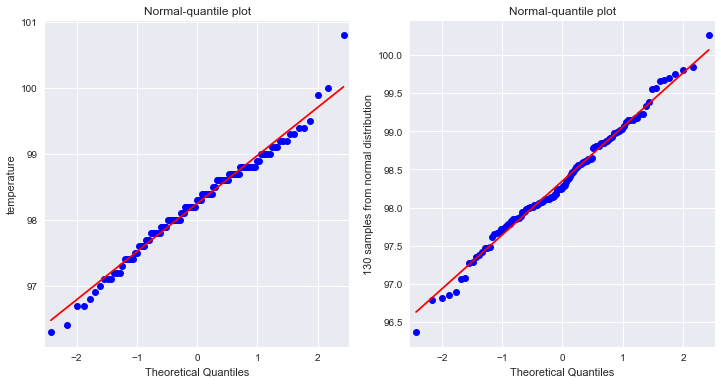

In [6]:
# quantile-quantile plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sm.qqplot(df.temperature, line='s', ax=ax1)
ax1.set_ylabel('temperature')
ax1.set_title('Normal-quantile plot')

sm.qqplot(np.random.normal(loc=98.249231, scale=0.733183, size=130), line='s', ax=ax2)
ax2.set_ylabel('130 samples from normal distribution')
ax2.set_title('Normal-quantile plot')

plt.show()


In [7]:
# use library function to assess
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

#### Q2. Is the sample size large? Are the observations independent?

I would not consider this to be a large sample size depending on the experiment.   If the goal is to convince the entire medical community that the widely accepted mean of 98.6 F is is incorrect and that the true value is 98.2 (the mean value of this dataset), I would venture that it is not a large enough sample.  The human race is clearly widely distributed.  One might hypothesize differences in mean body temperature based on geography, ethnicity, ambient temperature, etc.

On the other hand, the dataset is large enough to satisfy the requirements of the Central Limit Theorem.

There is no basis in the problem for inferring that the observations are either independent or not.  One would assume the tests independent from the context.

#### Q3. Is the true population mean really 98.6 degrees F?

* Would you use a one-sample or two-sample test? Why?
    
__ I would use the one sample test because it is an experiment is to determine if there is a difference between a population mean (the usual 98.6 F) and a sample mean. Two sample tests are used to determine if there is a difference between means of two samples. __
    
* In this situation, is it appropriate to use the  *t*  or *z*  statistic?
     
__ I would use the z test because the t test is most appropriate when assessing smaller samples (< 30).  Code below. __

* Now try using the other test. How is the result be different? Why?

In [8]:
# z-test of null hypthesis: there is no difference between sample mean and accepted mean value.
from statsmodels.stats import weightstats as stests
z_stat, p_value_zt = stests.ztest(df.temperature, value=98.6)
print('z statistic: {}, p value(z-test): {}'.format(z_stat, p_value_zt))

z statistic: -5.4548232923645195, p value(z-test): 4.9021570141012155e-08


##### Interpretation of z test
The z-test says that given the hypothesis that 98.6 is the true mean of population temperature, it is extremely unlikely that
we would observe the sample data.  Therefore we conclude that 98.6 is __*not*__ the true mean temperature.

In [9]:
# t-test of null hypothesis: there is no difference between sample mean and accepted mean value.
t_stat, p_value_tt = stats.ttest_1samp(df.temperature, 98.6)
print('t statistic: {}, p value(t-test): {}'.format(t_stat, p_value_tt))

t statistic: -5.4548232923645195, p value(t-test): 2.4106320415561276e-07


##### How the z-test and t-test differ
In this case, both tests agree that it is highly unlikely that 98.6 is the true population mean.  In fact, the value of the respective statistics is identical.  They differ in the assessment of the probability by an order of magnitude.  This is because the z-test uses the z-distribution (normal) and the the t-test uses the t-distribution which has fatter tails.  Thus the t-test provides a higher estimate of the likelyness of the null hypothesis (the value is clearly way out on the tail).

#### Q4. Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  *t*  and  *z*  statistic?

In [10]:
theSample = np.random.choice(df.temperature, size=10); theSample

array([ 98.8,  97.7,  97.8,  98.2,  97.6,  99.2,  98.8,  98.5,  97.1,  96.7])

In [11]:
# z-test of small sample
z_stat, p_value_zt = stests.ztest(theSample, value=98.6)
print('z statistic: {}, p value(z-test): {}'.format(z_stat, p_value_zt))

z statistic: -2.208997068760463, p value(z-test): 0.02717484478893408


In [12]:
# t-test of small sample
t_stat, p_value_tt = stats.ttest_1samp(theSample, 98.6)
print('t statistic: {}, p value(t-test): {}'.format(t_stat, p_value_tt))

t statistic: -2.208997068760463, p value(t-test): 0.05453439507519581


###### Answer: the t-test is more appropriate for small sample sizes, so that would be the test to use on a sample of 10.

The t-test gives a smaller p-value, strong enough to disqualify the null hypothesis, while the z-test with a p-val > 5% would not.

#### At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [13]:
# standard error of the mean is given by std/n**0.5 or stats.sem
stats.sem(df.temperature)

0.064304416837891024

In [14]:
# confidence interval is [mean - std*sem, mean + std*sem]
sampleMean = np.mean(df.temperature)
sampleSTD = np.std(df.temperature)
StdErr = stats.sem(df.temperature)
print('confidence interval: [{:4.2f}, {:4.2f}]'.format(sampleMean - sampleSTD * StdErr, sampleMean + sampleSTD * StdErr))

confidence interval: [98.20, 98.30]


##### Answer: Because our sample is only 130 points we don't have too much precision in our mean temperature.  The confidence interval says we have 95% confidence in a value between 98.2 and 98.3. 

If we use 98.3 as the mean and 0.7 as a (conservative) standard deviation, 35/130 have temperatures at least 1 std away from the mean and 8/130 are at least 2 std away.  There is 1/130 at least 3 std out.  These figures include temperatures both higher and lower than the mean.

One is prompted to ask if everyone in the sample was healthy?

As a layperson, I would assume that a temperature of 100F is a fever; 100F is a bit than 2 std out from the median in this sample (presumably a better representation of the true median of the population than 98.6).

2 std out on the low side is 96.7, certainly low but apparently not unheard of.

I suggest that this question is better answered by a physician rather than a statistician.  

My own experience tells me that instead of a population median, an individual median would provide a more accurate rendering of 
'abnormal' temperature.

If forced to provide an answer I would label temperatures over 99.7 as abnormal (this is 2 std above the median) and ignore low temperatures.

In [15]:
(df.temperature < (98.3 - 0.7)).sum() + (df.temperature > (98.3 + 0.7)).sum()

35

In [16]:
(df.temperature < (98.3 - 1.4)).sum() + (df.temperature > (98.3 + 1.4)).sum()

8

In [17]:
(df.temperature < (98.3 - 2.1)).sum() + (df.temperature > (98.3 + 2.1)).sum()

1

### Q6. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [18]:
maleTemps = df.loc[df.gender == 'M', 'temperature']

In [19]:
maleStd, maleMean = np.std(maleTemps), np.mean(maleTemps)
print('Mean Temp (Males): {:4.2f}, std. dev: {:4.2f}'.format(maleMean, maleStd))

Mean Temp (Males): 98.10, std. dev: 0.69


In [20]:
femaleTemps = df.loc[df.gender == 'F', 'temperature']

In [21]:
femaleStd, femaleMean = np.std(femaleTemps), np.mean(femaleTemps)
print('Mean Temp (Males): {:4.2f}, std. dev: {:4.2f}'.format(femaleMean, femaleStd))

Mean Temp (Males): 98.39, std. dev: 0.74


In [22]:
z_stat, p_value_zt = stests.ztest(maleTemps, femaleTemps);
print('z statistic: {:4.2f}, p value(z-test): {:4.2f}'.format(z_stat, p_value_zt))

z statistic: -2.29, p value(z-test): 0.02


##### Answer:   There is a significant difference between the two populations.  The p-value of 0.02 indicates it is highly unlikely that the mean values of the populations are the same.

I used the z-test because there are 60 samples of each.  The t-test is best when samples are considerably smaller (< 15).  For  purposes of comparison, the t-test is below.  The results are essentially identical to the z-test.

In [23]:
t_stat, p_value_tt = stats.ttest_ind(maleTemps, femaleTemps)
print('t statistic: {:4.2f}, p value(t-test): {:4.2f}'.format(t_stat, p_value_tt))

t statistic: -2.29, p value(t-test): 0.02


##### Answer (continued)
In the context of the problem the result seems quite significant.  The generally accepted mean temperature is a ungendered value.  It would seem to be reasonable to provide separate values for males and females since the data show that there is a significant (0.3F) difference in mean temperatures between the genders.  

Further these data suggest that current measurements would provide a more accurate 'normal' mean temperature for both males and females than the conventional value of 98.6F for everyone.